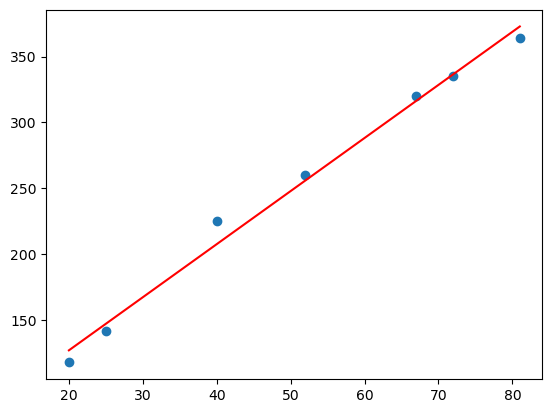

In [3]:
import pandas as pd #importando a biblioteca pandas - manipulação e vizualização de dados
import matplotlib.pyplot as plt #importando a biblioteca matplotlib - gráficos, tabelas, etc
import numpy as np #importando a biblioteca numpy - processamento de dados em alto volume e em varios tipos

# Importando a base de vendas
base = pd.read_excel("Investimento_x_Venda.xlsx")
from sklearn import linear_model #importando a biblioteca sklearn - modelo de Machine Learning 

regressao = linear_model.LinearRegression() #definindo a var reg como modelo de regressão linear

regressao.fit(base["Investimento em marketing"].values.reshape(-1,1),base["Venda Qtd"]) #passando a array de valores para o fit do meu modelo de regressao

regressao.coef_ #coeficiente angular da minha reta (x)

regressao.intercept_ #coeficiente linear da minha reta (y)

plt.scatter(base["Investimento em marketing"],base["Venda Qtd"]) #montando meu grafico 
x = np.array(base["Investimento em marketing"]) #definindo a array que será meu coeficiente angular
y = regressao.intercept_ + x*regressao.coef_ #definindo a array que será  meu coeficiente linear
plt.plot(x,y,"r") 
plt.show() #printa o gráfico com a reta mais precisa entre os pontos do gráfico


In [ ]:
prev = float(input("digite o valor do investimento em tráfego pago (milhares de R$): "))

regressao.predict([[prev]]) #prever qual sera a qts de vendas caso o investimento seja de 75k


plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
plt.scatter(prev,regressao.predict([[prev]])[0],color="k") 
x = np.array(base["Investimento em marketing"])
y = regressao.intercept_ + x*regressao.coef_
plt.plot(x,y,"r")
plt.show() #printa o ponto na reta que será a previsão mais exata da qtd de vendas
print(f'O ponto preto na reta representa a estimativa de vendas para um investimento de R${prev}000')
vendas = np.ceil(regressao.predict([[prev]]))#aqui temos o valor exato das vendas estimadas para o investimentode 75k
print(f'A estimativa de vendas é de {vendas}')
valor = float(input("digite o valor médio da venda(unidade, EM R$):" ))
faturamento = np.ceil(valor * vendas)
print(f'O faturamento é de: R${faturamento}')
roi = (faturamento/prev / 1000) 
print(f'O ROI dessa simulação será de: {roi}')
